# Hough Transform - using cv2

The Hough Transform is a popular technique in image processing and computer vision used to detect and extract geometric shapes, particularly lines and curves, from an image. It was proposed by Paul Hough in 1962 and has since been extended to detect other shapes like circles and ellipses.

The Hough Transform works in a parameter space, where each point in the parameter space corresponds to a possible shape in the image.

 The main steps involved in the Hough Transform for line detection are as follows:

1. **Edge Detection:** Prior to applying the Hough Transform, it is common to perform edge detection using techniques like the Canny edge detector to obtain a binary image with prominent edges.

2. **Parameter Space Accumulation:** For each edge pixel in the binary image, the Hough Transform maps it into the parameter space. In the case of line detection, the parameters typically represent the slope (m) and intercept (b) of the line equation (y = mx + b). Each edge point generates a curve in the parameter space, and these curves intersect at the parameter values corresponding to the lines in the image.

3. **Accumulator Thresholding:** After accumulating the curves in the parameter space, a thresholding step is often applied to identify the significant peaks. These peaks represent the parameters of the detected lines. The thresholding helps filter out spurious curves caused by noise or irrelevant edges.

4. **Line Extraction:** The peaks in the parameter space are converted back to the image space to obtain the lines. The extracted lines can be represented by their endpoints or other desired representations.


The Hough Transform has several advantages. 
- robust to noise, partial occlusions, and gaps in the edges. 
- can detect lines even when they are broken or not continuous. 
- not sensitive to the initial position or orientation of the shape.


> *Note:*   
I had a different experience when implementing hough transform for circle detection. The algorithm was unable to identify circles that had gaps in them. Contouring is much more efficient and effective. However, it is possible that I didnt implement the algorithm well enough.

However, Hough Transform can be computationally expensive, especially for images with large parameter spaces. Several optimizations and variations have been proposed to address this limitation, such as the use of different parameterizations, parallelization techniques, and voting schemes.


## Code

Code Source: 
1. https://towardsdatascience.com/lines-detection-with-hough-transform-84020b3b1549  
2. https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html


### Circle Detection


In [5]:
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def main(argv,filename):
    # Loads an image
    src = cv.imread(filename, cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_circle.py [image_name -- default ] \n')
        return -1

    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    
    plt.imshow(gray,cmap="gray")
    gray = cv.medianBlur(gray, 5)
    plt.imshow(gray,cmap="gray")
  
    rows = gray.shape[0]
    circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,param1=100, param2=30,minRadius=1, maxRadius=30)
    
    print(circles)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv.circle(src, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv.circle(src, center, radius, (255, 0, 255), 3)
    
    
    plt.imshow(src)
    plt.show()
    return 0

[[[376.5  81.5  26.6]
  [347.5 238.5  26.6]
  [293.5 320.5  27.9]
  [205.5 210.5  26.8]
  [386.5 169.5  26.4]
  [219.5 306.5  27.2]
  [269.5 116.5  25.7]
  [ 32.5 227.5  25.7]
  [ 99.5 259.5  28.1]
  [134.5 328.5  26.8]
  [150.5 270.5  28.2]
  [286.5 214.5  27.1]]]


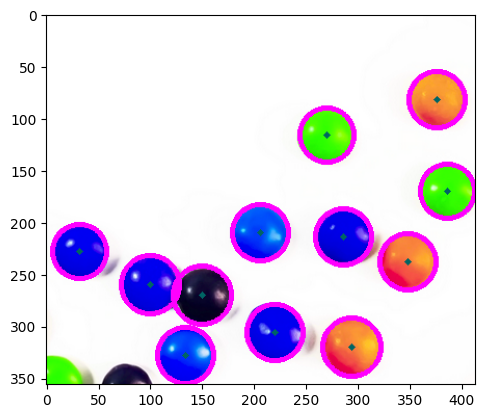

In [11]:
if __name__ == "__main__":
    main(sys.argv[1:],"./Images/hough.png")